In [1]:
from pathlib import Path

from toolbox_continu_inzicht.base.data_adapter import Config, DataAdapter

c:\Data\Python\TBCI\toolbox-continu-inzicht\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = Path.cwd() / "data_sets"
config = Config(config_path=path / "test_fragility_multiple_curves_piping.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)

```yaml
GlobalVariables:
    rootdir: "data_sets"
    moments: [-24,0,24,48]

    FragilityCurvesPiping:
        


DataAdapter:
    default_options:
        csv:
            sep: ","
        
    probabilistic_input:
        type: csv
        file: "invoer_multiple_piping_sections.csv"
    waterlevels:
        type: csv
        file: "waterlevels.csv"
    fragility_curves:
        type: csv
        file: "fragility_multiple_curves_piping.csv"

```

In [3]:
from toolbox_continu_inzicht.fragility_curves import FragilityCurvesPiping

In [4]:
fragility_curve_piping = FragilityCurvesPiping(data_adapter=data_adapter)
fragility_curve_piping.run(
    input=["probabilistic_input", "waterlevels"], output="fragility_curves"
)

In [5]:
fragility_curve_piping.df_out

,waterlevel,failure_probability,section_id,scenario_id,mechanism
0,0.0,1.955538e-32,1,1,sellmeijer
1,0.1,1.020085e-31,1,1,sellmeijer
2,0.2,5.351751e-31,1,1,sellmeijer
3,0.3,2.820484e-30,1,1,sellmeijer
4,0.4,1.491263e-29,1,1,sellmeijer
...,...,...,...,...,...
1000,19.6,1.000000e+00,2,4,heave
1001,19.7,1.000000e+00,2,4,heave
1002,19.8,1.000000e+00,2,4,heave
1003,19.9,1.000000e+00,2,4,heave


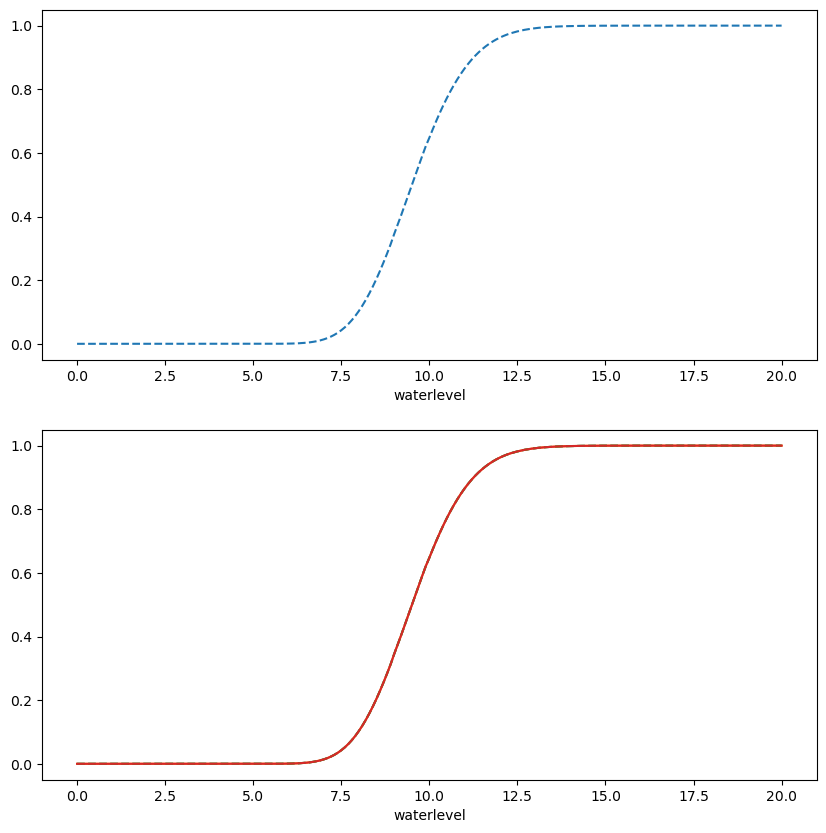

In [6]:
import matplotlib.pyplot as plt

section_ids = fragility_curve_piping.df_out["section_id"].unique()
df = fragility_curve_piping.df_out.set_index("waterlevel")
fig, ax = plt.subplots(len(section_ids), 1, figsize=(10, 10))
for i, section_id in enumerate(section_ids):
    df_id = df[df["section_id"] == section_id]
    for j, secenario_id in enumerate(df_id["scenario_id"].unique()):
        df_scen = df_id[df_id["scenario_id"] == secenario_id]
        ls = "-"
        if j % 2 == 0:
            ls = "--"
        df_scen["failure_probability"].plot(ax=ax[i], color=f"C{j}", ls=ls)